
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Sistemas de Recomendación

## Objetivos del Laboratorio

1.	Implementar y comparar diferentes tipos de sistemas de recomendación utilizando datos reales.

2.	Explorar el impacto de las características de los datos en la calidad de las recomendaciones.

3.	Desarrollar habilidades en preprocesamiento, modelado y evaluación de sistemas de recomendación.


## Los problemas

A lo largo de este laboratorio deberás enfrentarte a distintos casos prácticos:

- **Caso 1: Sistema de Recomendación Basado en Contenido**

	Debes construir un sistema que recomiende videojuegos similares basándose en su descripción y géneros. Para eso deberás:

	- Preprocesar las descripciones de los juegos (texto) utilizando técnicas de NLP aprendidas durante la clase.

	- Extraer y limpiar las etiquetas de género para su uso en el sistema de recomendación.

	- Implementar una métrica de similitud (como el coseno) para recomendar juegos similares.

	- Evaluar las recomendaciones generadas para un conjunto de juegos específicos.

- **Caso 2: Sistema de Recomendación Basado en Popularidad**

	Debes un sistema que recomiende los juegos más populares según su calificación general y número de reseñas. Para eso deberás:
	
	- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
	- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.
	
	- Crear una tabla de recomendaciones generales para diferentes géneros.

## Los Datos


- **1. games_description.csv**: Este archivo contiene información detallada sobre videojuegos disponibles en una tienda. Las columnas que tenemos son: 


	- **`name`**: Nombre del videojuego.

	- **`short_description`**: Breve descripción del videojuego.

	- **`long_description`**: Descripción completa y detallada del videojuego.

	- **`genres`**: Lista de géneros asociados al videojuego (por ejemplo, Acción, RPG).

	- **`minimum_system_requirement`**: Requisitos mínimos para ejecutar el videojuego.

	- **`recommend_system_requirement`**: Requisitos recomendados para ejecutar el videojuego.

	- **`release_date`**: Fecha de lanzamiento del videojuego.

	- **`developer`**: Nombre del desarrollador del videojuego.

	- **`publisher`**: Nombre del publicador del videojuego.

	- **`overall_player_rating`**: Calificación general de los jugadores (categórica).

	- **`number_of_reviews_from_purchased_people`**: Número de reseñas realizadas por personas que compraron el juego.

	- **`number_of_english_reviews`**: Número de reseñas en inglés.

	- **`link`**: Enlace al videojuego en la tienda.


- **2. games_ranking.csv**: Este archivo contiene información sobre el ranking de videojuegos basados en diferentes métricas. Las columnsa que tenemos son:


	- **`game_name`**: Nombre del videojuego.

	- **`genre`**: Género principal del videojuego.

	- **`rank_type`**: Tipo de ranking (por ejemplo, ventas, popularidad).

	- **`rank`**: Posición del videojuego en el ranking correspondiente.

----

- Los datos del archivo `games_description.csv` pueden utilizarse para construir sistemas de recomendación basados en contenido.
- Los datos del archivo `games_ranking.csv` son ideales para implementar sistemas basados en popularidad.


In [1]:
import pandas as pd 
import numpy as np 
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform    #Para calcular distancias en varios plano (pdist), para medir distancia aplanando todo (squareform)
import ast

## Comenzamos con el sistema de recomendación de contenido

In [2]:
datos=pd.read_csv("datos/games_description.csv")

In [3]:
datos.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


### Posible tratamiento de Genre

In [4]:
datos["genres"][0] 

"['Mythology', 'Action RPG', 'Action', 'RPG', 'Souls-like', 'Combat', 'Story Rich', 'Singleplayer', 'Drama', 'Action-Adventure', 'Dark Fantasy', 'Atmospheric', 'Adventure', '3D', 'Fantasy', 'Hack and Slash', 'Third Person', 'Difficult', 'Music', 'Violent']"

In [5]:
datos["genres"][1] 

"['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', 'First-Person', 'PvP', 'Online Co-Op', 'Co-op', 'Strategy', 'Military', 'War', 'Difficult', 'Trading', 'Realistic', 'Fast-Paced', 'Moddable']"

In [6]:
datos["genres"][2] 

"['Warhammer 40K', 'Action', 'Third-Person Shooter', 'Adventure', 'Multiplayer', 'Action-Adventure', 'PvE', 'Co-op', 'Third Person', 'Wargame', 'Sci-fi', '3D', 'Narration', 'Fantasy', 'Space', 'War', 'Realistic', 'Singleplayer', 'Cinematic', 'Futuristic']"

In [7]:
datos["genres"][100] 

'[\'Casual\', \'3D\', \'RPG\', \'Social Deduction\', \'First-Person\', \'Multiplayer\', \'Comedy\', \'Party-Based RPG\', \'Tactical RPG\', \'Third Person\', "1990\'s", \'Strategy\', \'Character Customization\', \'Online Co-Op\', \'Co-op\', \'Politics\', \'PvP\', \'Sexual Content\']'

In [8]:
datos["genres"][113] 

"['Souls-like', 'Dark Fantasy', 'Difficult', 'RPG', 'Atmospheric', 'Lore-Rich', 'Third Person', 'Exploration', 'Story Rich', 'Action RPG', 'Co-op', 'Great Soundtrack', 'Adventure', 'Action', 'Multiplayer', 'PvP', 'Open World', 'Singleplayer', 'Character Customization', 'Replay Value']"

## Explicación de porque no hago cambios a genre  
  
- ***Hemos identificado casos que pudieran suponer que era necesario hacer una limpieza de genre ("Action", "RPG", y "Action RPG") porque se estaría duplicando etc si otras columnas no lo tienen igual. Lo bueno, es que se ha identificado que tanto en el caso comentado como en casos como por ejemplo  "Action-Adventure" que tiene también "Action" y "Adventure" por separado.***  
  
Con esto, se concluye que en el momento en el que dos categorías como "Action" y "Adventure" aparecen como géneros de un juego, automaticamente aparece la categoría con ellos agrupados "Action-Adventure" y como eso es así en todas, no supone un inconveniente.

### Posible tratamiento de long_description  
***Decido usar long_description porque short_description tiene nulos***

In [9]:
# datos["long_description"][0]

In [10]:
datos["long_description"]=datos["long_description"].str.replace("About This Game\n", "")
datos["long_description"]=datos["long_description"].str.replace("\t", "")

In [11]:
datos["long_description"][:3]

0    Black Myth: Wukong is an action RPG rooted in ...
1    For over two decades, Counter-Strike has offer...
2    Embody the superhuman skill and brutality of a...
Name: long_description, dtype: object

### AHORA PASAMOS A LA CREACIÓN DEL SISTEMA DE RECOMENDACIÓN USANDO AMBAS GENRE Y LONG_DESCRIPTION

In [12]:
datos['columnas_comparadoras'] = datos['genres'] + " " + datos['long_description']

## Ahora ya especificamos el sistema de recomendación

In [13]:
vectorizer=CountVectorizer(stop_words="english")
vectorizer

CountVectorizer(stop_words='english')

Ahora ya tenemos todas nuestras palabras tagueadas

In [14]:
X=vectorizer.fit_transform(datos["columnas_comparadoras"]).toarray()
X[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
similarity=cosine_similarity(X)


In [16]:
def get_index_from_name(name,df):
    return df[df.name==name].index[0]


def get_name_from_index(index,df):
    return df[df.index==index]["name"].values[0]

In [17]:
user_like_game="ELDEN RING"
game_index= get_index_from_name(user_like_game, datos)   #esto me devuelve el indice de la peli del usuario
game_index

np.int64(4)

aqui sacamos los indices y distancias del resto de las pelis resecto a nuestra peli

In [18]:
similar_games=list(enumerate(similarity[game_index]))
similar_games[:5]

[(0, np.float64(0.22185983431872888)),
 (1, np.float64(0.09117943031028607)),
 (2, np.float64(0.1699855199942064)),
 (3, np.float64(0.19972593066017022)),
 (4, np.float64(1.0))]

Lo ordenamos para que nos de las pelis que más se parecen a nuestra peli

In [19]:
sorted_movies=sorted(similar_games, key=lambda x: x[1], reverse=True)
sorted_movies[:5]

[(4, np.float64(1.0)),
 (41, np.float64(0.32277711566027)),
 (10, np.float64(0.2857177524264819)),
 (36, np.float64(0.28482234759343916)),
 (22, np.float64(0.2800833148042275))]

In [20]:
top_game ={}
for i in sorted_movies[1:21]:
    top_game[get_name_from_index(i[0], datos)]=i[1]
top_game

{'The Elder Scrolls® Online': np.float64(0.32277711566027),
 'Cyberpunk 2077: Phantom Liberty': np.float64(0.2857177524264819),
 'Diablo® IV': np.float64(0.28482234759343916),
 'The First Descendant': np.float64(0.2800833148042275),
 'DARK SOULS™ III': np.float64(0.2768852547937683),
 'ELDEN RING Shadow of the Erdtree': np.float64(0.2717810774556866),
 'Hogwarts Legacy': np.float64(0.2702181120846626),
 'Path of Exile': np.float64(0.26420817585354067),
 'Grounded': np.float64(0.25447559241323076),
 'Dota 2': np.float64(0.24915501750446026),
 "Dragon's Dogma 2": np.float64(0.24471416133959328),
 'The Crew™ 2': np.float64(0.2412380972855618),
 'Fallout 4': np.float64(0.2344180808877151),
 'Ale & Tale Tavern': np.float64(0.23063607346408938),
 'Divinity: Original Sin 2 - Definitive Edition': np.float64(0.23059267191633048),
 'Valheim': np.float64(0.22980850258737767),
 'The Witcher 3: Wild Hunt': np.float64(0.22718341508030823),
 'The Elder Scrolls V: Skyrim Special Edition': np.float64(0

### AHORA PONGO A PRUEBA MI SISTEMA DE RECOMENDACIÓN CON 5 JUEGOS AL AZAR

In [32]:
conjunto_prueba=list(datos["name"].sample(5, random_state=42))

In [33]:
conjunto_prueba

['Sonic Frontiers',
 'Descenders',
 'Risk of Rain 2',
 'Slime Rancher',
 'theHunter: Call of the Wild™']

In [35]:
for juego in conjunto_prueba:  
    user_like_game=juego

    game_index= get_index_from_name(user_like_game, datos)   #esto me devuelve el indice de la peli del usuario

    #Aqui sacamos los indices y distancias del resto de las pelis resecto a nuestra peli
    similar_games=list(enumerate(similarity[game_index]))

    #Lo ordenamos para que nos de las pelis que más se parecen a nuestra peli
    sorted_movies=sorted(similar_games, key=lambda x: x[1], reverse=True)

    top_game ={}
    for i in sorted_movies[1:11]:
        top_game[get_name_from_index(i[0], datos)]=i[1]
    display(top_game)

{'Hollow Knight': np.float64(0.35376927581575107),
 'Forza Horizon 5': np.float64(0.32294863751294417),
 'ELDEN RING Shadow of the Erdtree': np.float64(0.2951094713158346),
 'Hogwarts Legacy': np.float64(0.294491070307201),
 'Borderlands 2': np.float64(0.27852318295812006),
 'Fallout: New Vegas': np.float64(0.26807844697524263),
 "Dragon's Dogma 2": np.float64(0.26301544996009785),
 'Gunfire Reborn': np.float64(0.2547749038131039),
 'Diablo® IV': np.float64(0.2511794681419141),
 'Visions of Mana': np.float64(0.25110440111401955)}

{'EA SPORTS™ Madden NFL 25': np.float64(0.3509040568767734),
 'F1® Manager 2024': np.float64(0.29096966022793597),
 'eFootball™': np.float64(0.26014699899298427),
 "Tom Clancy's Rainbow Six® Siege": np.float64(0.23421229988159897),
 'World of Tanks': np.float64(0.22103807127148764),
 'Game Dev Tycoon': np.float64(0.19843356300250437),
 'PUBG: BATTLEGROUNDS': np.float64(0.19263546233804263),
 'Team Fortress 2': np.float64(0.19106832947036512),
 'LOCKDOWN Protocol': np.float64(0.19082131148799952),
 'DiRT Rally 2.0': np.float64(0.17664114551889942)}

{'Gunfire Reborn': np.float64(0.3489758774573249),
 'Borderlands 2': np.float64(0.33411928336095853),
 'Left 4 Dead 2': np.float64(0.3266386465125491),
 'Vampire Survivors': np.float64(0.2813319050365181),
 'Hollow Knight': np.float64(0.27587424226704627),
 'ELDEN RING Shadow of the Erdtree': np.float64(0.27050033401953),
 'EA SPORTS FC™ 24': np.float64(0.267792670136185),
 'Call of Duty®: Warzone™': np.float64(0.2653679994043582),
 'Motordoom': np.float64(0.26503027584015004),
 'Team Fortress 2': np.float64(0.2626594605044535)}

{'Core Keeper': np.float64(0.23044220760431694),
 'Ale & Tale Tavern': np.float64(0.22582676042711475),
 'Fallout 4': np.float64(0.21774600264264088),
 'Terraria': np.float64(0.21571180751361685),
 'Valheim': np.float64(0.2136994073431811),
 'Satisfactory': np.float64(0.20720722589321167),
 'The Elder Scrolls® Online': np.float64(0.2064763339300389),
 'Grounded': np.float64(0.20224770167392253),
 'The Witcher 3: Wild Hunt': np.float64(0.1993914605873603),
 'Mount & Blade II: Bannerlord': np.float64(0.1959456260246403)}

{'Fishing Planet': np.float64(0.2833000170779653),
 'The Crew™ 2': np.float64(0.2596570636873982),
 'Forza Horizon 5': np.float64(0.23052348874162368),
 'Arma 3': np.float64(0.2300637831529964),
 'Ale & Tale Tavern': np.float64(0.22838591162312186),
 '7 Days to Die': np.float64(0.22421816503027936),
 'Terraria': np.float64(0.2190076741597075),
 'RIDE 4': np.float64(0.218549470413572),
 'World of Tanks': np.float64(0.2174986490634646),
 'Russian Fishing 4': np.float64(0.21482601273991536)}

**RECOMENDACION POR PUNTUACIÓN**

In [45]:
ratings=pd.read_csv("datos/games_ranking.csv")

In [46]:
ratings

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2
2,Cyberpunk 2077,Action,Sales,3
3,Black Myth: Wukong,Action,Sales,4
4,ELDEN RING,Action,Sales,5
...,...,...,...,...
667,MXGP PRO,Sports & Racing,Review,36
668,MXGP 2019 - The Official Motocross Videogame,Sports & Racing,Review,37
669,Ride 2,Sports & Racing,Review,38
670,Tanuki Sunset,Sports & Racing,Review,39


In [ ]:
ratings.set_index("Movie", inplace=True)

In [ ]:
def plot_ratings_por_peli(peli1,peli2):
    x=ratings.T[peli1]
    y=ratings.T[peli2]

    n=list(ratings.columns)

    plt.figure(figsize=(10,7))

    plt.scatter(x,y)
    plt.title(f"{peli1} VS {peli2}")
    plt.xlabel(peli1)
    plt.ylabel(peli2)

    

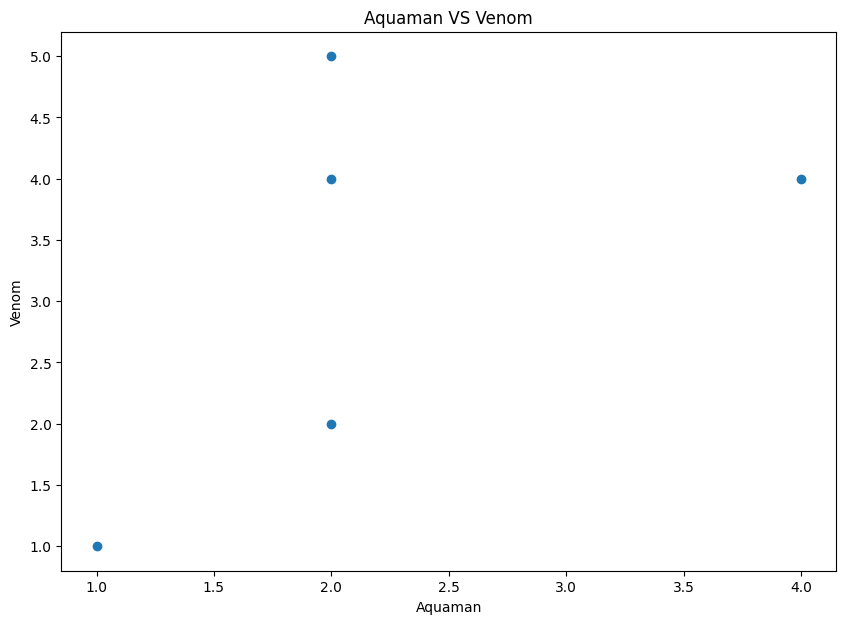

In [ ]:
plot_ratings_por_peli("Aquaman", "Venom")

In [ ]:
pdist(ratings.T, "euclidean")

array([6.63324958, 6.        , 7.41619849, 7.48331477, 6.92820323,
       6.40312424, 5.09901951, 5.56776436, 8.24621125, 6.70820393])

In [ ]:
distancias= squareform(pdist(ratings.T, "euclidean"))
distancias

array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

Aquí normalizamos las distancias

In [ ]:
similitud= 1/(1+distancias)

In [ ]:
pd.DataFrame(similitud, columns=ratings.columns, index=ratings.columns)

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


***Generamos un nuevo usuario***

In [ ]:
ratings.T.columns

Index(['Aquaman', 'Avengers: Infinity War', 'Black Panther',
       'Bohemian Rhapsody', 'Deadpool 2',
       'Fantastic Beasts: The Crimes of Grindelwald', 'Incredibles 2',
       'Jurassic World: Fallen Kingdom', 'Mission: Impossible – Fallout',
       'Venom'],
      dtype='object', name='Movie')